# 深度卷积神经网络（AlexNet）

In [1]:
import torch 
from torch import nn
from d2l import torch as d2l

In [7]:
net = nn.Sequential(
                    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(3,stride=2),
                    nn.Conv2d(96,256,kernel_size=5,padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(3,stride=2),
                    nn.Conv2d(256,384,kernel_size=3,padding=1),
                    nn.ReLU(),
                    nn.Conv2d(384,384,kernel_size=3,padding=1),
                    nn.ReLU(),
                    nn.Conv2d(384,384,kernel_size=3,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(3,stride=2),
                    nn.Flatten(),
                    nn.Linear(9600,4096),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(4096,4096),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(4096,1000)

)

我们构造一个 单通道数据，来观察每一层输出的形状

In [8]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 384, 5, 5])
Flatten Output shape:	 torch.Size([1, 9600])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

Fashion-MNIST图像的分辨率 低于ImageNet图像。 我们将它们增加到 224×224

In [9]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

训练AlexNet

loss 0.335, train acc 0.877, test acc 0.873
17.4 examples/sec on cuda:0


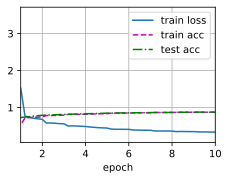

In [10]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())